# 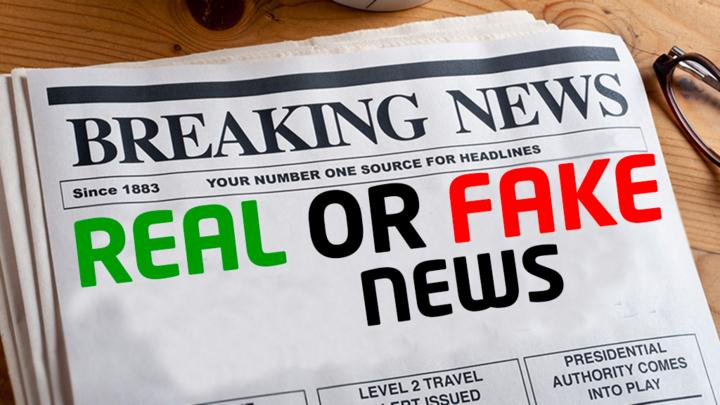



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the necesarry Libraries

Here I am going to importing some of the required library, if extra library is required to install It will be install later on.

In [ ]:
import numpy as np
import pandas as pd
import csv
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re
from sklearn.model_selection import GridSearchCV

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Reading the Dataset and checking the null values and distribution of the target coulmn

In [ ]:
news=pd.read_csv('/content/drive/MyDrive/news.csv')
news.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
news

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [ ]:
news.isnull().sum()

title    0
text     0
label    0
dtype: int64

<Axes: xlabel='label', ylabel='count'>

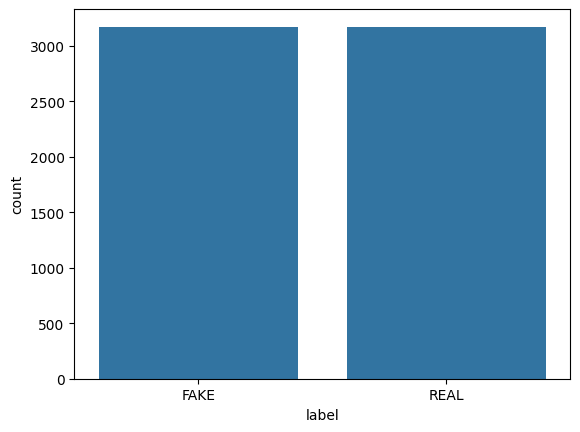

In [ ]:
sns.countplot(x='label',data=news)

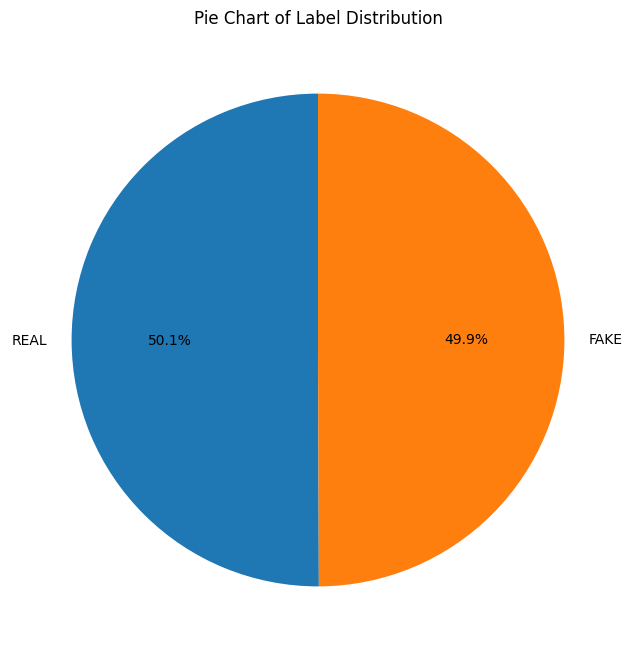

In [ ]:
import matplotlib.pyplot as plt


label_counts = news['label'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Label Distribution')
plt.show()

# Data Cleaning Part

In [ ]:
# Define stopwords
stop_words = set(stopwords.words('english'))
# Function to preprocess and tokenize text
def preprocess_and_tokenize(text):
    # Lowercase, tokenize, filter stopwords and non-alphabetic words
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

news['text'].apply(lambda x: " ".join(preprocess_and_tokenize(x)))

# Aggregate texts by label and preprocess
real_texts = " ".join(news[news['label'] == 'REAL']['text'])
fake_texts = " ".join(news[news['label'] == 'FAKE']['text'])

# Count most common words
real_word_counts = Counter(real_texts.split()).most_common(20)
fake_word_counts = Counter(fake_texts.split()).most_common(20)

# Create DataFrames for easy visualization/manipulation
real_words_df = pd.DataFrame(real_word_counts, columns=['Word (REAL)', 'Frequency'])
fake_words_df = pd.DataFrame(fake_word_counts, columns=['Word (FAKE)', 'Frequency'])

# Optionally, you can print or return these DataFrames
print(real_words_df)
print(fake_words_df)


   Word (REAL)  Frequency
0          the     143771
1           to      78281
2           of      68271
3            a      62286
4          and      59850
5           in      52541
6         that      36925
7           is      26065
8          for      25380
9           on      22946
10        with      16650
11          he      16593
12          as      16406
13         was      15665
14         his      15196
15         The      14507
16        have      13404
17         has      13133
18          be      12630
19         are      12417
   Word (FAKE)  Frequency
0          the     114516
1           of      60050
2           to      58445
3          and      51569
4            a      40215
5           in      35978
6         that      27347
7           is      25886
8          for      18092
9           on      14678
10         The      12690
11        with      12646
12          as      12565
13         are      12165
14          by      11186
15          be      11171
16         w

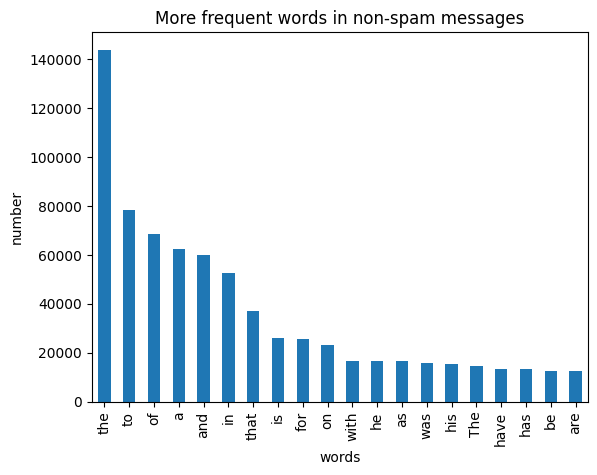

In [ ]:
real_words_df.plot.bar(legend=False)
y_pos=np.arange(len(real_words_df['Frequency']))
plt.xticks(y_pos, real_words_df["Word (REAL)"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

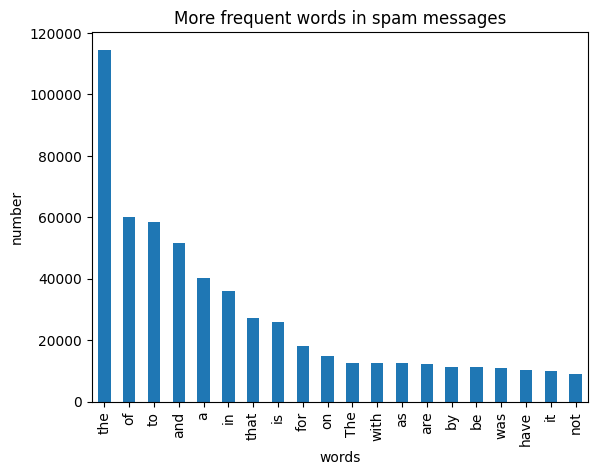

In [ ]:
fake_words_df.plot.bar(legend=False)
y_pos=np.arange(len(fake_words_df['Frequency']))
plt.xticks(y_pos, fake_words_df["Word (FAKE)"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [ ]:
import string
def clean_token(text):
    text=text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
news['text']=news['text'].apply(lambda x:clean_token(x))

In [ ]:
news['text']

0       daniel greenfield  a shillman journalism fello...
1       google pinterest digg linkedin reddit stumbleu...
2       u s  secretary of state john f  kerry said mon...
3         kaydee king   kaydeeking  november    the le...
4       it s primary day in new york and front runners...
                              ...                        
6330    the state department told the republican natio...
6331    the  p  in pbs should stand for  plutocratic  ...
6332     anti trump protesters are tools of the oligar...
6333    addis ababa  ethiopia  president obama convene...
6334    jeb bush is suddenly attacking trump  here s w...
Name: text, Length: 6335, dtype: object

## Train-Test Split for training the Ml algorithms

In [ ]:
x=news['text']
y=news['label']

In [ ]:
x

0       daniel greenfield  a shillman journalism fello...
1       google pinterest digg linkedin reddit stumbleu...
2       u s  secretary of state john f  kerry said mon...
3         kaydee king   kaydeeking  november    the le...
4       it s primary day in new york and front runners...
                              ...                        
6330    the state department told the republican natio...
6331    the  p  in pbs should stand for  plutocratic  ...
6332     anti trump protesters are tools of the oligar...
6333    addis ababa  ethiopia  president obama convene...
6334    jeb bush is suddenly attacking trump  here s w...
Name: text, Length: 6335, dtype: object

In [ ]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#One Hot Encoding (Bag of Words) Method :

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Convert the text to a bag-of-words representation
vectorizer = CountVectorizer()
X_train_onehot = vectorizer.fit_transform(X_train)
X_test_onehot = vectorizer.transform(X_test)

In [ ]:
X_train_onehot.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_train=y_train.map(lambda x:1 if x=='REAL' else 0)
y_test=y_test.map(lambda x:1 if x=='REAL' else 0)

In [ ]:
y_train

1142    1
2654    0
5395    0
1170    0
4371    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: label, Length: 5068, dtype: int64

# Machine Learning Models using Bag of Words

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train_onehot,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred_lr=LR.predict(X_test_onehot)
# Evaluate the accuracy of the classifier
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", lr_accuracy)

Accuracy: 0.920284135753749


In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       628
           1       0.92      0.92      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_onehot,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt=dt.predict(X_test_onehot)
# Evaluate the accuracy of the classifier
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", dt_accuracy)

Accuracy: 0.7947908445146015


In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       628
           1       0.79      0.80      0.80       639

    accuracy                           0.79      1267
   macro avg       0.79      0.79      0.79      1267
weighted avg       0.79      0.79      0.79      1267



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(X_train_onehot,y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
y_pred_gbc=GBC.predict(X_test_onehot)
# Evaluate the accuracy of the classifier
Gb_accuracy = accuracy_score(y_test, y_pred_gbc)
print("Accuracy:", Gb_accuracy)

Accuracy: 0.8887134964483031


In [ ]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       628
           1       0.90      0.88      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train_onehot,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_rfc=RFC.predict(X_test_onehot)
# Evaluate the accuracy of the classifier
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", rfc_accuracy)

Accuracy: 0.8966061562746646


In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       628
           1       0.91      0.89      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_train_onehot, y_train)

# Predict on the test set
nb_pred = nb_model.predict(X_test_onehot)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Model accuracy: {nb_accuracy * 100:.2f}%")

Model accuracy: 89.90%


In [ ]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       628
           1       0.88      0.93      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



In [ ]:
accuracy_df=pd.DataFrame(data=[('Logistic Regression',lr_accuracy),('Decision Tree',dt_accuracy),('GradientBoosting',Gb_accuracy),('RandomForest',rfc_accuracy),('Naive Bayes',nb_accuracy)])

In [ ]:
accuracy_df.colmns=['Model','Accuracy']

In [ ]:
X_train_onehot.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# TF-IDF Encoding Method

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Convert the text to a bag-of-words representation
tf_vectorizer = TfidfVectorizer(max_df=0.7)
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [ ]:
y_train=y_train.map(lambda x:1 if x=='REAL' else 0)
y_test=y_test.map(lambda x:1 if x=='REAL' else 0)

# Machine Learning Models using TF-IDF

In [ ]:
LR_tf= LogisticRegression()
LR_tf.fit(X_train_tf,y_train)

LogisticRegression()

In [ ]:
y_pred_lrtf=LR_tf.predict(X_test_tf)
# Evaluate the accuracy of the classifier
lr_tf_accuracy = accuracy_score(y_test, y_pred_lrtf)
print("Accuracy:", lr_tf_accuracy)

Accuracy: 0.9131807419100236


In [ ]:
print(classification_report(y_test,y_pred_lrtf))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       628
           1       0.93      0.90      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



In [ ]:
Dt_tf=DecisionTreeClassifier()
Dt_tf.fit(X_train_tf,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dttf=Dt_tf.predict(X_test_tf)
# Evaluate the accuracy of the classifier
dt_tf_accuracy = accuracy_score(y_test, y_pred_dttf)
print("Accuracy:", dt_tf_accuracy)

Accuracy: 0.8113654301499605


In [ ]:
print(classification_report(y_test,y_pred_dttf))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       628
           1       0.81      0.82      0.82       639

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267



In [ ]:
GBC_tf= GradientBoostingClassifier(random_state=0)
GBC_tf.fit(X_train_tf,y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
y_pred_GBtf=GBC_tf.predict(X_test_tf)
# Evaluate the accuracy of the classifier
GB_tf_accuracy = accuracy_score(y_test, y_pred_GBtf)
print("Accuracy:", GB_tf_accuracy)

Accuracy: 0.8910812943962115


In [ ]:
print(classification_report(y_test,y_pred_GBtf))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       628
           1       0.91      0.87      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



In [ ]:
RFC_tf= RandomForestClassifier(random_state=0)
RFC_tf.fit(X_train_tf,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_rfctf=RFC_tf.predict(X_test_tf)
# Evaluate the accuracy of the classifier
rfc_tf_accuracy = accuracy_score(y_test, y_pred_rfctf)
print("Accuracy:", rfc_tf_accuracy)

Accuracy: 0.8871349644830308


In [ ]:
print(classification_report(y_test,y_pred_rfctf))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       628
           1       0.90      0.88      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



In [ ]:
# Train the model
nb_tf_model = MultinomialNB()
nb_tf_model.fit(X_train_tf, y_train)

# Predict on the test set
nb_tf_pred = nb_tf_model.predict(X_test_tf)

# Calculate accuracy
nb_tf_accuracy = accuracy_score(y_test, nb_tf_pred)
print(f"Model accuracy: {nb_tf_accuracy * 100:.2f}%")

Model accuracy: 83.11%


In [ ]:
print(classification_report(y_test,nb_tf_pred))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80       628
           1       0.76      0.98      0.85       639

    accuracy                           0.83      1267
   macro avg       0.87      0.83      0.83      1267
weighted avg       0.87      0.83      0.83      1267



In [ ]:
accuracy_df_tfidf=pd.DataFrame(data=[('Logistic Regression',lr_tf_accuracy),('Decision Tree',dt_tf_accuracy),('GradientBoosting',GB_tf_accuracy),('RandomForest',rfc_tf_accuracy),('Naive Bayes',nb_tf_accuracy)])

In [ ]:
#bag of words encoding
accuracy_df
accuracy_df.columns=['Model','Accuracy']

In [ ]:
accuracy_df

,Model,Accuracy
0,Logistic Regression,0.920284
1,Decision Tree,0.784530
2,GradientBoosting,0.888713
3,RandomForest,0.896606
4,Naive Bayes,0.898974


In [ ]:
#TF-IDF encoding
accuracy_df_tfidf.columns=['Model','Accuracy']
accuracy_df_tfidf

,Model,Accuracy
0,Logistic Regression,0.913181
1,Decision Tree,0.811365
2,GradientBoosting,0.891081
3,RandomForest,0.887135
4,Naive Bayes,0.831097


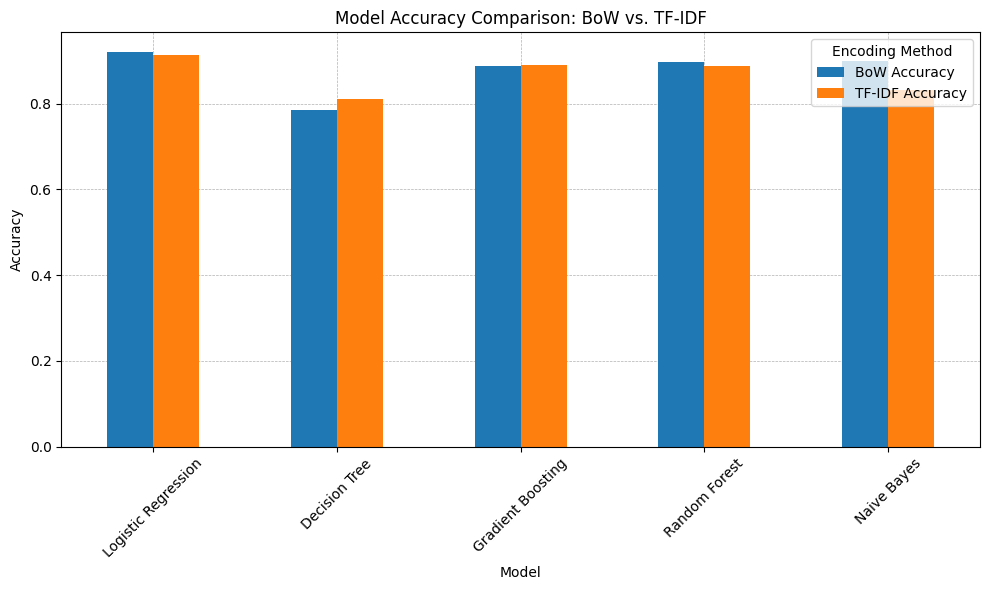

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'Naive Bayes']
bow_accuracies=accuracy_df['Accuracy']
tfidf_accuracies=accuracy_df_tfidf['Accuracy']
df = pd.DataFrame({
    'Model': models,
    'BoW Accuracy': bow_accuracies,
    'TF-IDF Accuracy': tfidf_accuracies
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
df.set_index('Model').plot(kind='bar', ax=ax)
ax.set_title('Model Accuracy Comparison: BoW vs. TF-IDF')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.grid(True, which='both', linestyle='--', linewidth='0.5')
ax.set_axisbelow(True)

plt.xticks(rotation=45)
plt.legend(title='Encoding Method')
plt.tight_layout()
plt.show()

# Reasons for Choosing Bag of Words Over TF-IDF:
1. Logistic Regression shows the highest accuracy with BoW at 0.920284, which is higher than any model's performance with TF-IDF encoding.
2. Consistently higher performance across multiple models—Most models perform better with BoW compared to TF-IDF.
3. Better performance for Naive Bayes and Random Forest with BoW, indicating that this encoding method generally results in stronger classifiers for your dataset.

# Optimizing ML Algorithms

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold,RandomizedSearchCV

In [ ]:
# Setting up parameter grid
param_grid_lr = {
    'C': np.logspace(-2, 2, 20),  # Explore a wider range around your initial setup
    'penalty': ['l1', 'l2'],      # l1 can be useful for feature selection
    'solver': ['liblinear']       # 'liblinear' works well with l1 penalty
}


In [ ]:
# Configure GridSearchCV
grid_search_lr = GridSearchCV(estimator=LR, param_grid=param_grid_lr, cv=5, verbose=2, scoring='accuracy',n_jobs=-1)

# Fit GridSearchCV
grid_search_lr.fit(X_train_onehot, y_train)

# Best parameters and best score
print("Best parameters:", grid_search_lr.best_params_)
print("Best score:", grid_search_lr.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters: {'C': 0.06951927961775606, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.9204861455905575


In [ ]:
# Get the best estimator
best_lr = grid_search_lr.best_estimator_

# Predict on the test set
y_pred = best_lr.predict(X_test_onehot)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")

Test accuracy: 0.92


In [ ]:
param_grid_dt = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Configure GridSearchCV
grid_search = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train_onehot, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8060443037358521


In [ ]:
# Get the best estimator
best_dt = grid_search.best_estimator_

# Predict on the test set
y_pred = best_dt.predict(X_test_onehot)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")

Test accuracy: 0.81


In [ ]:
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.5],
    'max_depth': [3, 5]
}

In [ ]:
grid_search_gb = GridSearchCV(GBC, param_grid_gb, cv=5, scoring='accuracy', verbose=1,n_jobs=-1)
grid_search_gb.fit(X_train_onehot, y_train)

print("Best parameters:", grid_search_gb.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_gb.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}
Best cross-validation score: 0.92


In [ ]:
param_grid_nb = {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],  # Expanding the range of alpha
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

stratified_kfold = StratifiedKFold(n_splits=10)
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=stratified_kfold, scoring='accuracy', verbose=1)
grid_search_nb.fit(X_train_onehot, y_train)

print("Best parameters:", grid_search_nb.best_params_)
print("Best score: {:.2f}".format(grid_search_nb.best_score_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best parameters: {'alpha': 0.001}
Best score: 0.90


In [ ]:
accuracy_df_gridsearch=pd.DataFrame(data=[('Logistic Regression',0.9204861455905575),
 ('Decision Tree',0.8060443037358521),
  ('GradientBoosting',0.92),
    ('Naive Bayes',0.90)])
accuracy_df_gridsearch.columns=['Model','Accuracy']

In [ ]:
accuracy_df_gridsearch

,Model,Accuracy
0,Logistic Regression,0.920486
1,Decision Tree,0.806044
2,GradientBoosting,0.920000
3,Naive Bayes,0.900000


In [ ]:
# Merging the DataFrames
comparison_df = pd.merge(accuracy_df, accuracy_df_gridsearch, on='Model', how='outer')
comparison_df.rename(columns={'Accuracy_x':'Before_GridSearch_Cv','Accuracy_y':'PostGridSearch_Cv'},inplace=True)

In [ ]:
comparison_df

,Model,Before_GridSearch_Cv,PostGridSearch_Cv
0,Logistic Regression,0.920284,0.920486
1,Decision Tree,0.784530,0.806044
2,GradientBoosting,0.888713,0.920000
3,RandomForest,0.896606,NaN
4,Naive Bayes,0.898974,0.900000


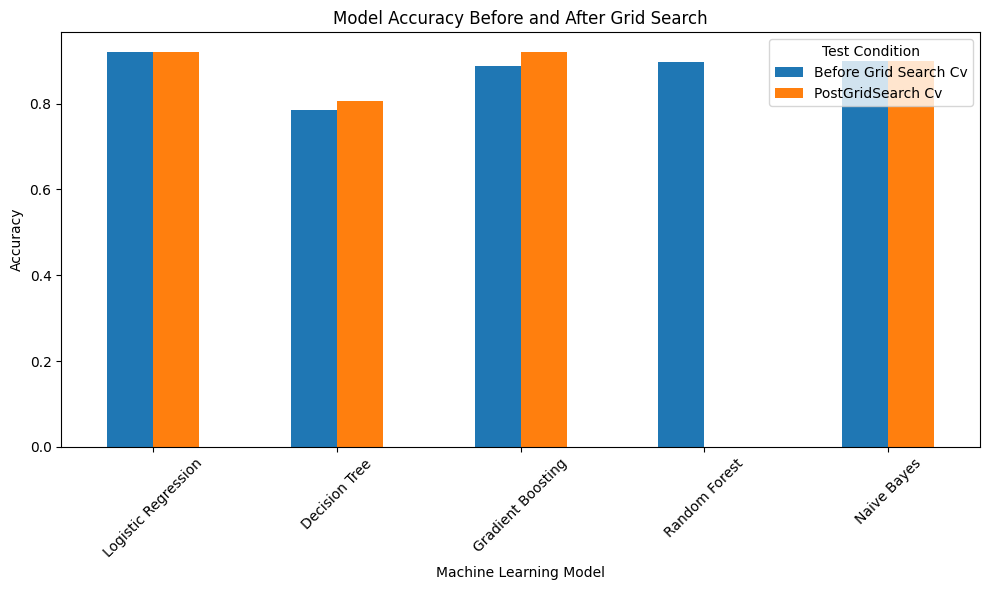

In [ ]:
# Data from the provided table
data = {
    "Model": ["Logistic Regression", "Decision Tree", "Gradient Boosting", "Random Forest", "Naive Bayes"],
    "Before Grid Search Cv": comparison_df['Before_GridSearch_Cv'],
    "PostGridSearch Cv": comparison_df['PostGridSearch_Cv']
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting the data as a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df.plot.bar(x='Model', y=["Before Grid Search Cv", "PostGridSearch Cv"], ax=ax)
ax.set_title('Model Accuracy Before and After Grid Search')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Machine Learning Model')
plt.xticks(rotation=45)
plt.legend(title='Test Condition')
plt.tight_layout()

plt.show()

# Data Preparation for RNN , LSTM model


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
# Tokenization and Padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences, maxlen=100, padding='post', truncating='post')
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=100, padding='post', truncating='post')

In [ ]:
# Labels encoding
y_train_encoded = y_train.map({'REAL': 1, 'FAKE': 0}).values
y_test_encoded = y_test.map({'REAL': 1, 'FAKE': 0}).values

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!echo '{"username":"sashankvasireddy","key":"9d6c8f9a8593d8fa9bc8dcd2abae3ea3"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d watts2/glove6b50dtxt
!unzip glove6b50dtxt.zip



Dataset URL: https://www.kaggle.com/datasets/watts2/glove6b50dtxt
License(s): CC0-1.0
 84% 57.0M/67.7M [00:00<00:00, 132MB/s]
100% 67.7M/67.7M [00:00<00:00, 133MB/s]
Archive:  glove6b50dtxt.zip
  inflating: glove.6B.50d.txt        


In [ ]:
# Function to load GloVe embeddings from a file
def load_glove_embeddings(path):
    embeddings_index = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Load embeddings
glove_path = '/content/glove.6B.50d.txt'
embeddings_index = load_glove_embeddings(glove_path)


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50  # As you've downloaded the 50-dimensional vectors

# Prepare embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# LSTM Model Implemenatation

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2,l2
from tensorflow.keras.initializers import Constant
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam ,RMSprop

In [ ]:
# Bidirectional LSTM Model Setup
model = Sequential([
    Embedding(vocab_size, embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=100, trainable=True),
    Bidirectional(LSTM(100, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)),
    Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.5)),
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Dropout(0.7),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001, verbose=1)

# Training
history = model.fit(
    X_train_padded, y_train_encoded,
    epochs=20,
    validation_data=(X_test_padded, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)



Epoch 1/20
159/159 [==============================] - 53s 236ms/step - loss: 0.5675 - accuracy: 0.7190 - val_loss: 0.3835 - val_accuracy: 0.8485 - lr: 0.0010
Epoch 2/20
159/159 [==============================] - 36s 228ms/step - loss: 0.3822 - accuracy: 0.8433 - val_loss: 0.2790 - val_accuracy: 0.8982 - lr: 0.0010
Epoch 3/20
159/159 [==============================] - 37s 231ms/step - loss: 0.3060 - accuracy: 0.8814 - val_loss: 0.2878 - val_accuracy: 0.9013 - lr: 0.0010
Epoch 4/20
159/159 [==============================] - 36s 226ms/step - loss: 0.2459 - accuracy: 0.9073 - val_loss: 0.2321 - val_accuracy: 0.9155 - lr: 0.0010
Epoch 5/20
159/159 [==============================] - 38s 237ms/step - loss: 0.1952 - accuracy: 0.9292 - val_loss: 0.2632 - val_accuracy: 0.9171 - lr: 0.0010
Epoch 6/20
159/159 [==============================] - 37s 231ms/step - loss: 0.1587 - accuracy: 0.9451 - val_loss: 0.2701 - val_accuracy: 0.9116 - lr: 0.0010
Epoch 7/20
159/159 [==============================] 

In [ ]:
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

40/40 [==============================] - 2s 38ms/step - loss: 0.2092 - accuracy: 0.9345
Test Accuracy: 93.45%


In [ ]:
from tensorflow.keras.layers import SimpleRNN

In [ ]:
l1_lambda = 0.001         # L1 regularization factor
l2_lambda = 0.001         # L2 regularization factor

# Optimizer
optimizer = RMSprop(learning_rate=0.0005)  # Using RMSprop optimizer
# Model construction
rnn_model = Sequential()
rnn_model.add(Embedding(vocab_size, embedding_dim, input_length=100))
rnn_model.add(SimpleRNN(64, return_sequences=False, kernel_regularizer=l1_l2(l1=l1_lambda, l2=l2_lambda)))
rnn_model.add(Dropout(0.6))  # Increased dropout rate
rnn_model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=l1_lambda, l2=l2_lambda)))
rnn_model.add(Dropout(0.6))  # Increased dropout rate
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Show the model summary
rnn_model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 100, 50)           2948000   
                                                                 
 simple_rnn_22 (SimpleRNN)   (None, 64)                7360      
                                                                 
 dropout_52 (Dropout)        (None, 64)                0         
                                                                 
 dense_60 (Dense)            (None, 32)                2080      
                                                                 
 dropout_53 (Dropout)        (None, 32)                0         
                                                                 
 dense_61 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2957473 (11.28 MB)
Trainable params: 29

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001, verbose=1)

# Training
history = rnn_model.fit(
    X_train_padded, y_train_encoded,
    epochs=30,
    validation_data=(X_test_padded, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/30
159/159 [==============================] - 6s 31ms/step - loss: 1.3492 - accuracy: 0.5051 - val_loss: 1.2561 - val_accuracy: 0.5249 - lr: 5.0000e-04
Epoch 2/30
159/159 [==============================] - 5s 29ms/step - loss: 1.1875 - accuracy: 0.5363 - val_loss: 1.1175 - val_accuracy: 0.5257 - lr: 5.0000e-04
Epoch 3/30
159/159 [==============================] - 4s 28ms/step - loss: 1.0482 - accuracy: 0.5673 - val_loss: 0.9855 - val_accuracy: 0.6717 - lr: 5.0000e-04
Epoch 4/30
159/159 [==============================] - 5s 29ms/step - loss: 0.8943 - accuracy: 0.7125 - val_loss: 0.8627 - val_accuracy: 0.6819 - lr: 5.0000e-04
Epoch 5/30
159/159 [==============================] - 4s 28ms/step - loss: 0.8423 - accuracy: 0.6975 - val_loss: 0.7532 - val_accuracy: 0.7459 - lr: 5.0000e-04
Epoch 6/30
159/159 [==============================] - 4s 28ms/step - loss: 0.7080 - accuracy: 0.7997 - val_loss: 0.5958 - val_accuracy: 0.8642 - lr: 5.0000e-04
Epoch 7/30
159/159 [====================

In [ ]:
loss, accuracy = rnn_model.evaluate(X_test_padded, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

40/40 [==============================] - 0s 9ms/step - loss: 0.4058 - accuracy: 0.9140
Test Accuracy: 91.40%


#Saving and loading  both the LSTM and RNN model

In [ ]:
rnn_model.save('/content/rnn_model.h5')  # Save the RNN model
model.save('/content/model.h5')          # Save the LSTM model

In [ ]:
from tensorflow.keras.models import load_model

# Load the models
model1 = load_model('/content/model.h5')


In [ ]:
model2 = load_model('/content/rnn_model.h5')

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

def prepare_input(text):
    sequences = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen=100, padding='post')  # Adjust 'maxlen' based on your model's training
    return padded

def predict_sentiment(model, text):
    prepared_input = prepare_input(text)
    prediction = model.predict(prepared_input)
    pred_label = 'True' if prediction[0][0] > 0.5 else 'False'
    return pred_label

def get_model_choice():
    choice = input("Choose the model (LSTM or RNN): ").strip().lower()
    if choice == 'lstm':
        return model
    elif choice == 'rnn':
        return rnn_model
    else:
        print("Invalid choice. Defaulting to LSTM model.")
        return model

# Example of using the function
model_choice = get_model_choice()
user_input = input("Enter text for sentiment analysis: ")
result = predict_sentiment(model_choice, user_input)
print("Predicted Sentiment:", result)



Choose the model (LSTM or RNN): LSTM
Enter text for sentiment analysis: Israel says it is looking at Gaza cease-fire proposal, but framework is not what it wants
1/1 [==============================] - 1s 1s/step
Predicted Sentiment: True
